# Autoencoders 

## capa de entrada, capa intermedia y capa de salida


## Shallow Autoencoder

In [5]:
import torch
import matplotlib.pyplot as plt
import torchvision as tv

class AE (torch.nn.Module):
    
    def __init__(_,vsize,hsize):
        super().__init__()
        _.L1 = torch.nn.Linear(vsize,hsize)
        _.L2 = torch.nn.Linear(hsize,vsize)
        torch.nn.Sequential()
        
    def forward(_,x):
        h = _.enc(x)
        out = _.dec(h)
        return out
    
    def enc(_,x):
        return torch.tanh(_.L1(x))
    def dec (_,h):
        return torch.tanh(_.L2(h))
        

torch.Size([1000, 10])
0.5878642201423645
0.0554862916469574
0.020924359560012817
0.013698006980121136
0.01037668064236641
0.008336854167282581
0.006997300777584314
0.006078966893255711
0.005419386085122824
0.004922921769320965


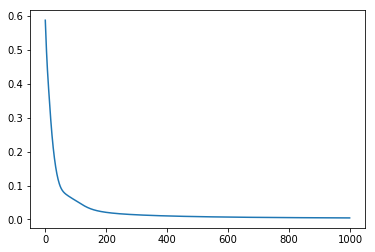

In [31]:
N = 10
M = 3
P = 1000
n = torch.randn(M,N)
z = torch.randn(P,M)
data = torch.mm(z,n).tanh()

print(data.size())

model = AE(N,M)
optim = torch.optim.Adam(model.parameters(),0.01)

lostf = torch.nn.MSELoss()

model.train()
T = 1000
err =[]
for i in range(T):
    
    
    optim.zero_grad()
    
    #data = x.view(10,-1)

    out = model (data)
    
    loss = lostf(data,out)
    
    loss.backward()
    
    optim.step()
    
    e = loss.item()
    err.append(e)
    if i%100 == 0: print(e)
plt.plot(err)


## Stacked Autoencoder

path = './'
file = 'Modelo_checkpoint'

torch.save(model,path+file) # Modelo guardado

model2 = torch.load(path+file) # Carga de modelo

#torch.save(model.state_dict(path+file)) # Estados que quiero guardar

#model.load_state_dict(torch.load(path+file)) # Carga de estado

In [15]:
class SAE (torch.nn.Module):
    
    def __init__(_,sizes):
        super().__init__()
        
        _.subnet = torch.nn.ModuleList()
        for i in range (len(sizes)-1):
            
            _.subnet.append(AE(sizes[i],sizes[i+1]))
        
    def enc(_,x, depth = None):
        #SI depth es None, lo toma como toda la red entera
        if depth is None:
            depth =  len(_.subnet)
        else: depth +=1
        xi = x
        #USO LA FUNCIÓN ENCODER DE LOS AE, ESTA SOLO LO MANDA PARA ALLA
        for i in range(depth):
            xi = _.subnet[i].enc(xi)
        return xi
    
    def dec (_,x, depth = None):
        #SI depth es None, lo toma como toda la red entera
        depth = len(_.subnet) if depth is None else depth +1
        xi = x
        #USO LA FUNCIÓN ENCODER DE LOS AE, ESTA SOLO LO MANDA PARA ALLA
        for i in reversed(range(depth)):
            xi = _.subnet[i].dec(xi)
        return xi    
    def forward (_,x, depth = None):
        yi = _.enc(x, depth)
        xi = _.dec(yi, depth)
        return xi, yi
    
    

In [19]:
T = 3
B = 50
N = 28*28
M = 64
C = 10


"""""""""""""""""""""""""""""""""""""""""""""TRAIN Y TEST """""""""""""""""""""""""""""""""""""""""""""
# Cargo un directorio ./data y baja los datos de entrenamiento - totensor los convierte en tensor
transf = tv.transforms.Compose(
    [ tv.transforms.ToTensor(),
      tv.transforms.Normalize([0.5],[0.5]) ])   # Normalizar por la Tanh.

trn_data = tv.datasets.MNIST(root='./data', train = True,  download = True, transform = transf  )
# Lo mismo para el test data
tsn_data = tv.datasets.MNIST(root='./data', train = False, download = True, transform = transf)
# Se puede trabajar automaticamente con mini batch
trn_load = torch.utils.data.DataLoader (dataset = trn_data, batch_size = B, shuffle = True)
tsn_load = torch.utils.data.DataLoader (dataset = tsn_data, batch_size = B, shuffle = True)

""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    



''

Depth:  0
0 de 3


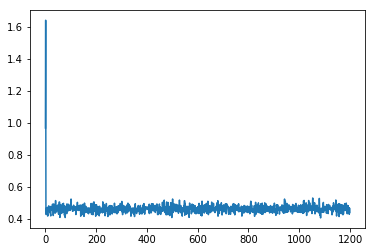

1 de 3


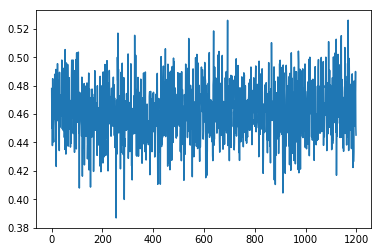

2 de 3


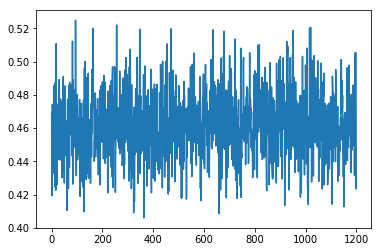

Depth:  1
0 de 3


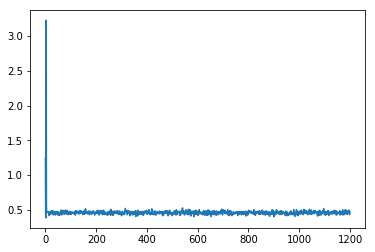

1 de 3


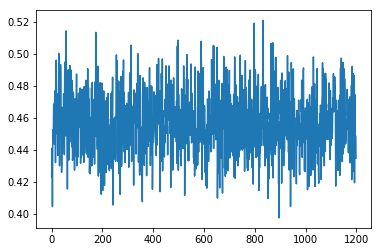

KeyboardInterrupt: 

In [21]:
sizes = [ N, 512, 128, M]
model = SAE(sizes)

optim = torch.optim.Adam(model.parameters(),0.01)
lostf = torch.nn.MSELoss()

model.train()

for depth in range(len(model.subnet)):
    print('Depth: ', depth)
    
    for t in range (T):
        
        err = []
        er = 0
        for images,labels in trn_load:
            optim.zero_grad() 

            data = images.view(-1,N)
            x,y = model(data,depth)
            loss = lostf(x,data)

            loss.backward()
            err.append(loss.item())
            
            
            optim.step()

        print(t,'de', T)
        plt.plot(err)
        plt.show()

### Generar un stacked autoencoder

### Hay que usar ModuleList
### enc(_,x,depth = None)
### dec(_,x,depth = None)